In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
index_names = ['engine', 'cycle']
# Operational conditions: altitude, mach_number and throttle_resolver_angle
operational_condition_names = ['altitude', 'TRA', 'mach_nr']
sensor_names = ['T2', # total temperature at fan inlet
                'T24',# total temperature at LPC outlet
                'T30', # total temperature at HPC outlet
                'T50', # total temperature at LPT outlet
                'P2', # Pressure at fan inlet
                'P15', #Total pressure in bypass-duct
                'P30', #Total pressure at HPC outlet
                'Nf', #Physical fan speed rpm
                'Nc', #Physical core speed rpm
                'epr', #Engine pressure ratio (P50/P2)
                'Ps30', #Static pressure at HPC outlet
                'phi', #Ratio offuel flow to Ps30
                'NRf', #Corrected fan speed
                'NRc', #Corrected core speed
                'BPR', #Bypass Ratio
                'farB', #Burner fuel-air ratio
                'htBleed', #Bleed Enthalpy
                'Nf_dmd', # Demanded fan speed rpm
                'PCNfR_dmd', #Demanded corrected fan speed rpm
                'W31', #HPT coolant bleed lbm/s
                'W32', #LPT coolant bleed
                ]
# options to visualize the datadrame
pd.set_option('display.width', 100)
col_names = index_names + operational_condition_names + sensor_names
df = pd.read_csv('data/train_FD001.txt', sep=' ', lineterminator='\n', header=0, index_col=False, names=col_names)
print(df.columns)
print(df.head(5))


Index(['engine', 'cycle', 'altitude', 'TRA', 'mach_nr', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15',
       'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd',
       'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')
   engine  cycle  altitude     TRA  mach_nr      T2     T24      T30      T50     P2  ...     phi  \
0       1      2    0.0019 -0.0003    100.0  518.67  642.15  1591.82  1403.14  14.62  ...  522.28   
1       1      3   -0.0043  0.0003    100.0  518.67  642.35  1587.99  1404.20  14.62  ...  522.42   
2       1      4    0.0007  0.0000    100.0  518.67  642.35  1582.79  1401.87  14.62  ...  522.86   
3       1      5   -0.0019 -0.0002    100.0  518.67  642.37  1582.85  1406.22  14.62  ...  522.19   
4       1      6   -0.0043 -0.0001    100.0  518.67  642.10  1584.47  1398.37  14.62  ...  521.68   

       NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0  2388.07  8131.49  8.4318  0.03      392    2388      100.0 

Text(0.5, 1.0, 'Engine3')

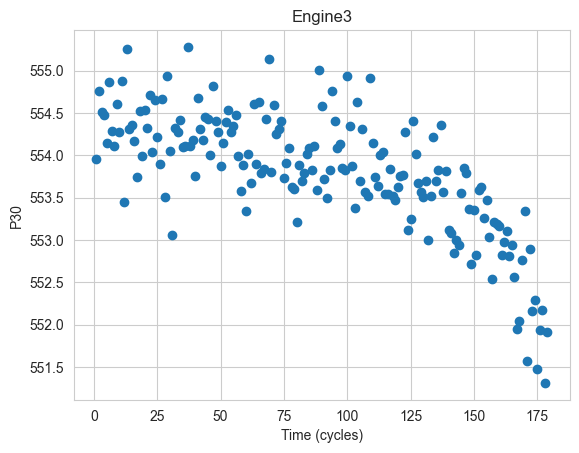

In [4]:
# condition monitoring signals
engine_id = 3
v2_engine1 = df.loc[df['engine'] == engine_id, 'P30']
time_engine1 = df.loc[df['engine'] == engine_id, 'cycle']
plt.scatter(time_engine1,v2_engine1)
plt.xlabel('Time (cycles)')
plt.ylabel('P30')
plt.title('Engine' + str(engine_id))

Text(0, 0.5, 'Operational Condition mach_nr')

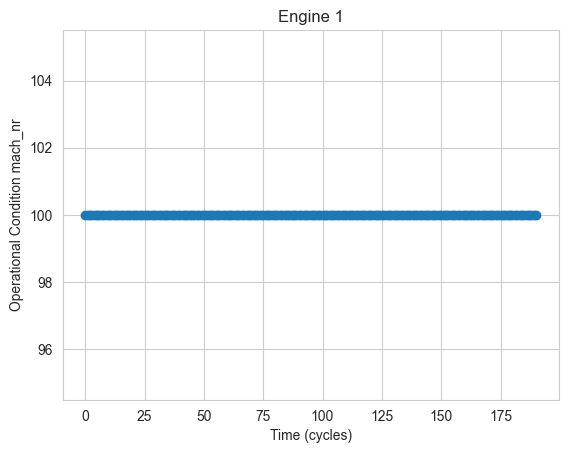

In [6]:
# operational conditions
op_condition_name = 'mach_nr'
op_engine1 = df.loc[df.engine == 1, op_condition_name]
plt.scatter(range(len(op_engine1)), op_engine1)
plt.xlabel('Time (cycles)')
plt.title('Engine 1')
plt.ylabel('Operational Condition ' + op_condition_name)

In [8]:
#Adding the RUL column
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

df1 = df.groupby('engine').apply(add_rul)
df1.head()

/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_82431/1596578781.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df.groupby('engine').apply(add_rul)


engine  cycle  altitude     TRA  mach_nr      T2     T24      T30      T50     P2  ...  \
engine                                                                                       ...   
1      0       1      2    0.0019 -0.0003    100.0  518.67  642.15  1591.82  1403.14  14.62  ...   
       1       1      3   -0.0043  0.0003    100.0  518.67  642.35  1587.99  1404.20  14.62  ...   
       2       1      4    0.0007  0.0000    100.0  518.67  642.35  1582.79  1401.87  14.62  ...   
       3       1      5   -0.0019 -0.0002    100.0  518.67  642.37  1582.85  1406.22  14.62  ...   
       4       1      6   -0.0043 -0.0001    100.0  518.67  642.10  1584.47  1398.37  14.62  ...   

              NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  RUL  
engine                                                                                     
1      0  2388.07  8131.49  8.4318  0.03      392    2388      100.0  39.00  23.4236  190  
       1  2388.03  8133.23  8.4178  0.03      390    2388      100.0  38.95  23.3442  189  
       2  2388.08  8133.83  8.3682  0.03      392    2388      100.0  38.88  23.3739  188  
       3  2388.04  8133.80  8.4294  0.03      393    2388      100.0  38.90  23.4044  187  
       4  2388.03  8132.85  8.4108  0.03      391    2388      100.0  38.98  23.3669  186  

[5 rows x 27 columns]

In [24]:
y1 = df1['RUL']/400
X1 = df1.drop(['RUL', 'engine'], axis=1)

y_1_train = y1[df1.engine.values < 70]
y_1_test = y1[df1.engine.values >= 70]

X1_train = X1.loc[df1.engine < 70, :]
X1_test = X1.loc[df1.engine >=  70, :]

for col in X1_train.columns:
    if np.max(X1_train[col].values) - np.min(X1_train[col].values) != 0:
        X1_train.loc[:,col] = (X1_train[col].values - np.min(X1_train[col].values)) / (np.max(X1_train[col]) - np.min(X1_train[col].values))
    else:
        X1_train.loc[:,col] = 1
for col in X1_train.columns:
    if np.max(X1_train[col].values) - np.min(X1_train[col].values) != 0:
        X1_test.loc[:,col] = (X1_test[col].values - np.min(X1_test[col].values)) / (np.max(X1_test[col]) - np.min(X1_test[col].values))
    else:
        X1_test.loc[:, col] = 1

/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_82431/3943187073.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00277008 0.00554017 0.00831025 ... 0.99445983 0.99722992 1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X1_train.loc[:,col] = (X1_train[col].values - np.min(X1_train[col].values)) / (np.max(X1_train[col]) - np.min(X1_train[col].values))
/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_82431/3943187073.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.36363636 0.18181818 0.36363636 ... 0.72727273 0.72727273 0.81818182]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X1_train.loc[:,col] = (X1_train[col].values - np.min(X1_train[col].values)) / (np.max(X1_train[col]) - np.min(X1_train[col].values))
/var/fol

In [23]:
from sklearn import neural_network

test_engines = df1.engine.values[df1.engine.values >= 70] # indicates at each data point the engine (test)

nn = neural_network.MLPRegressor()
nn.fit(X1_train, y_1_train)
predictions = nn.predict(X1_test)

errors = predictions - (y_1_test)
print('\nNeural networks')
print('MAE', np.mean(np.abs(errors))*400)
print('RMSE', np.sqrt(np.mean(np.power(errors,2)))*400)



Neural networks
MAE 38.52612200257835
RMSE 51.94509658659071


In [40]:
params = { 'hidden_layer_sizes' : [10,10],
    'activation' : 'relu',
    'solver' : 'adam',
    'alpha' : 0.0,
    'batch_size' : 10,
    'random_state' : 0,
    'tol' : 0.0001,
    'nesterovs_momentum' : False,
    'learning_rate' : 'constant',
    'learning_rate_init' : 0.01,
    'max_iter' : 1000,
    'shuffle' : True,
    'n_iter_no_change' : 50,
    'verbose' : False }

In [112]:
nn = neural_network.MLPRegressor(**params)

nn.fit(X1_train, y_1_train)
predictions = nn.predict(X1_test)

errors = predictions - (y_1_test)
print('\nNeural networks')
print('MAE', np.mean(np.abs(errors))*400)
print('RMSE', np.sqrt(np.mean(np.power(errors,2)))*400)

# Try with 10, 50, 100 in the first layer [hidden_layer_sizes] = instability

Iteration 59, loss = 0.00344606
Iteration 60, loss = 0.00343391
Iteration 61, loss = 0.00344014
Iteration 62, loss = 0.00343589
Iteration 63, loss = 0.00343862
Iteration 64, loss = 0.00342837
Iteration 65, loss = 0.00341774
Iteration 66, loss = 0.00342798
Iteration 67, loss = 0.00342694
Iteration 68, loss = 0.00341882
Iteration 69, loss = 0.00342403
Iteration 70, loss = 0.00341232
Iteration 71, loss = 0.00341875
Iteration 72, loss = 0.00341714
Iteration 73, loss = 0.00341310
Iteration 74, loss = 0.00340936
Iteration 75, loss = 0.00341215
Iteration 76, loss = 0.00340926
Iteration 77, loss = 0.00339082
Iteration 78, loss = 0.00340136
Iteration 79, loss = 0.00340672
Iteration 80, loss = 0.00339728
Iteration 81, loss = 0.00340019
Iteration 82, loss = 0.00339178
Iteration 83, loss = 0.00338806
Iteration 84, loss = 0.00337552
Iteration 85, loss = 0.00338888
Iteration 86, loss = 0.00338260
Iteration 87, loss = 0.00339547
Iteration 88, loss = 0.00338466
Iteration 89, loss = 0.00338106
Iteratio

/Users/marciabaptista/PycharmProjects/MMA_2024/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [111]:
params = { 'hidden_layer_sizes' : [10, 10], # 50, 100, 150 [
    'activation' : 'relu',
    'solver' : 'adam',
    'alpha' : 0.0,
    'batch_size' : 1,
    'random_state' : 0,
    'tol' : 0.0001,
    'nesterovs_momentum' : False,
    'learning_rate' : 'constant',
    'learning_rate_init' : 0.0001,
    'max_iter' : 1000,
    'shuffle' : True,
    'n_iter_no_change' : 50,
    'verbose' : True }